------------------------------------------------------------------------------------------------------------------------------------

#### Import Dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


#### Read dataset

In [2]:
df = pd.read_csv('WineQuality.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
1,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
2,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
3,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
4,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine


#### Sorting out values according to 1st column

In [3]:
df.sort_values("Unnamed: 0")

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,White Wine
1,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,White Wine
2,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,White Wine
3,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,White Wine
4,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32477,6495,7.6,0.27,0.34,5.0,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,6,White Wine
32481,6495,7.6,0.27,0.34,5.0,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,6,White Wine
32483,6496,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5,Red Wine
32482,6496,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5,Red Wine


Seems that the 1st column is a sort of batching of how the data has been collected. Since the 1st column doesn't really affect the dataset, the whole column can be dropped.

In [4]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
1,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
2,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
3,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
4,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine


#### Checking for any null values in the dataset


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

checking for each column data type

#### Checking for statistical values of the dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 3.2+ MB


#### Wine type distribution

#### There is only 1 column that has categorical values, which is the "Type" column. This column will be converted to numerical values using the LabelEncoder

In [8]:
#Labelencoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type']) 

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,1
1,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,1
2,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,1
3,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,1
4,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,1


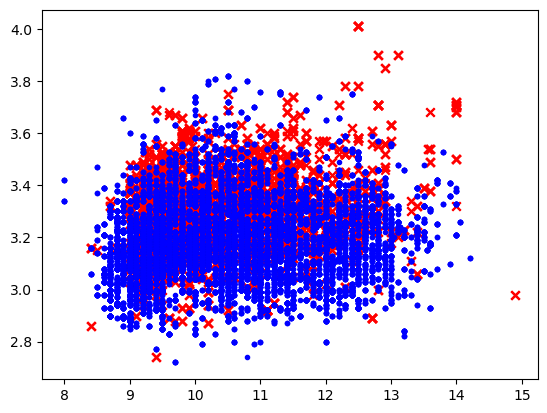

In [9]:
df0 = df[df['Type'] == 0]
df1 = df[df['Type'] == 1]

plt.scatter(df0['alcohol'], df0['pH'], color='red', label='Type 0', marker='x')
plt.scatter(df1['alcohol'], df1['pH'], color='blue', label='Type 1', marker='.')

So there are only 2 types of wine types and each of the wine types having non numerical values will be converted into numerical values.i.e 0 and 1. O for red ad 1 for white. Now that the wine type is now converted into 0 and 1 this can be taken as a binary classification problem.

#### Data and targets are separated into 2 different variables

In [10]:
data = df.drop('Type', axis=1)
target = df['Type']

It is good to check for class imblanaces in the dataset because this might affect the performacne of the model. If there is a class imbalance, the model will be biased towards the majority class.

In [11]:
count_0 = len(df[df['Type']==0])
count_1 = len(df[df['Type']==1])


if count_0 > count_1:
    ratio = count_0/count_1
else:
    ratio = count_1/count_0

ratio

3.0444472111553784

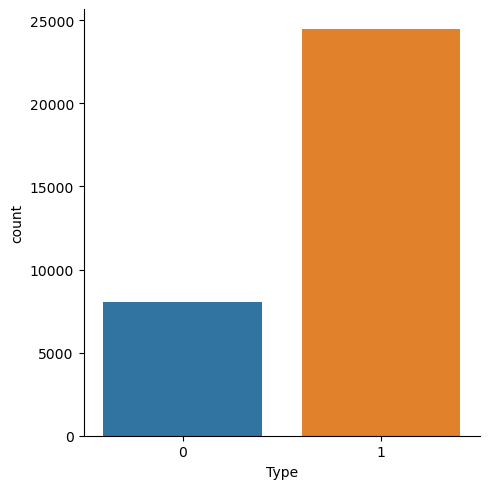

In [12]:
sns.catplot(x='Type', data=df, kind='count')

In this case, there is a class imbalance. The white wine class is the majority class and the red wine class is the minority class. This can be seen in the bar graph below.

#### SMOTE Implementation for class imbalance

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
sampled_data, sampled_targets = smote.fit_resample(data, target)
df_new = pd.concat([pd.DataFrame(sampled_data), pd.DataFrame(sampled_targets)], axis=1)
df_new.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,1
1,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,1
2,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,1
3,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,1
4,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6,0
96,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6,0
97,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6,0
98,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6,0


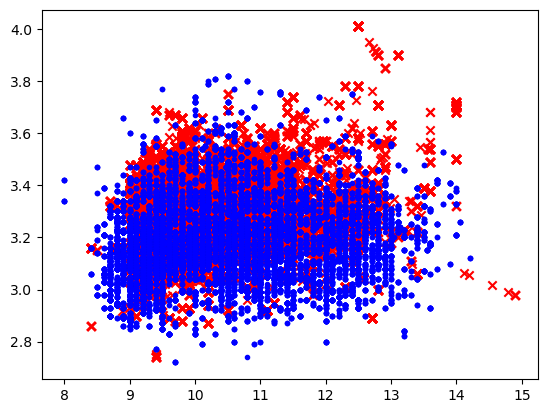

In [14]:
df0_new = df_new[df_new['Type'] == 0]
df1_new = df_new[df_new['Type'] == 1]

plt.scatter(df0_new['alcohol'], df0_new['pH'], color='red', label='Type 0', marker='x')
plt.scatter(df1_new['alcohol'], df1_new['pH'], color='blue', label='Type 1', marker='.')

#### Normalizing the data using MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sampled_data)


In [16]:
#spliting the dataset into train and test and validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sampled_data, sampled_targets, test_size=0.2, random_state=90)

As stated above, now that this can be taken as a binary classification problem, logistic regression can be used to train the model.

-------------------------------------------------------------------------------------------------------------------------

### Using Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

In [18]:
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.9874258842772439


---------------------------------------------------------------------------------------------------

### Using Decision Tree Classifier


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_dt


array([1, 1, 1, ..., 1, 0, 1])

#### Accuracy score

In [19]:
accuracy_score(y_test, y_pred_dt)

0.9996933142506644

#### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
conf_mat_dt


array([[4882,    3],
       [   0, 4897]], dtype=int64)

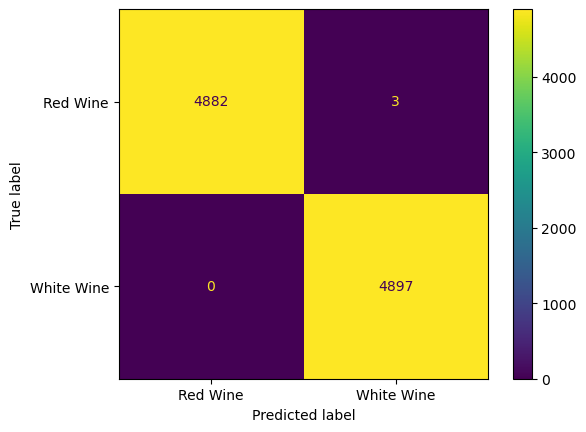

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay 
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_mat_dt, display_labels=['Red Wine','White Wine'])
disp_dt.plot()


#### Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4885
           1       1.00      1.00      1.00      4897

    accuracy                           1.00      9782
   macro avg       1.00      1.00      1.00      9782
weighted avg       1.00      1.00      1.00      9782



--------------------------------------------------------------------------------------------------------------

### Using Random Forest

In [23]:
#using random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)


#### Acuuracy Score

In [24]:
accuracy_score(y_test, y_pred_rf)

0.9998977714168882

#### Confusion Matrix

In [25]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
conf_mat_rf


array([[4884,    1],
       [   0, 4897]], dtype=int64)

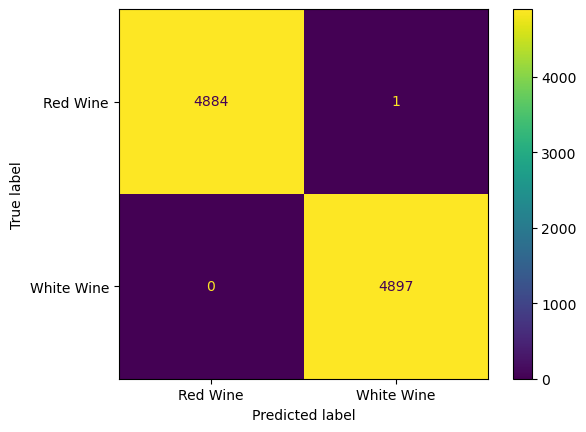

In [26]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_mat_rf, display_labels=['Red Wine','White Wine'])
disp_rf.plot()


#### Classification Report

In [27]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4885
           1       1.00      1.00      1.00      4897

    accuracy                           1.00      9782
   macro avg       1.00      1.00      1.00      9782
weighted avg       1.00      1.00      1.00      9782



------------------------------------------------------------------------------------------------------

## Using KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

accuracy_score(y_test, y_pred_knn)


0.9955019423430791

In [29]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
conf_mat_knn

array([[4880,    5],
       [  39, 4858]], dtype=int64)

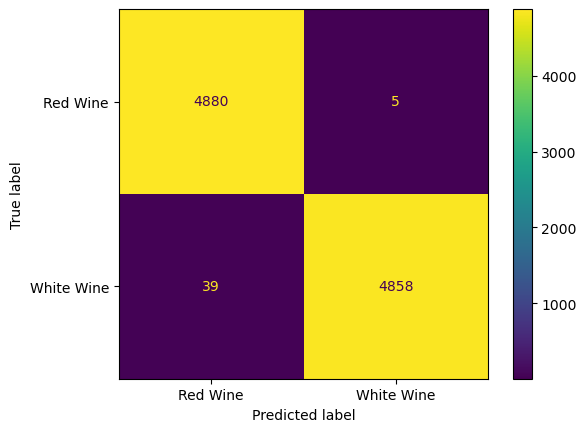

In [30]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn, display_labels=['Red Wine','White Wine'])
disp_knn.plot()


In [31]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4885
           1       1.00      0.99      1.00      4897

    accuracy                           1.00      9782
   macro avg       1.00      1.00      1.00      9782
weighted avg       1.00      1.00      1.00      9782



--------------------------------------------------------------------------------------------------------------

### Using Support Vector Machine

In [32]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', kernel='poly', C=1)
svm.fit(x_train, y_train)
 

In [ ]:
y_pred_svm = svm.predict(x_test)

accuracy_score(y_test, y_pred_svm)

0.984870169699448

In [ ]:
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
conf_mat_svm

array([[4807,   78],
       [  70, 4827]], dtype=int64)

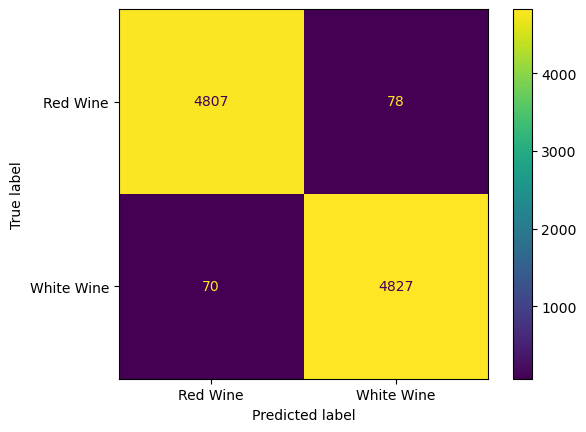

In [ ]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_mat_svm, display_labels=['Red Wine','White Wine'])
disp_svm.plot()


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4885
           1       0.98      0.99      0.98      4897

    accuracy                           0.98      9782
   macro avg       0.98      0.98      0.98      9782
weighted avg       0.98      0.98      0.98      9782



In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)